<a href="https://colab.research.google.com/github/AryanilAD/Corporate-Training-Mini_Projects/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aryanil Dey**

# **22MSRDS065**

# **Assignment day 23**

In [44]:
import pandas as dimpy
import numpy as nimpy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [45]:
data=dimpy.read_csv("/content/Times_of_India_Healines_since_jan_2020_score.csv")

In [46]:
data.head()

,index,Unnamed: 0,S_No,URL,Date,Headline,Headline Link,Positive,Negative,Neutral,Compound
0,0,0,0,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Shivin Narang injures his hand on the set of h...,http://timesofindia.indiatimes.com//tv/news/hi...,24.2,0.0,75.8,49.39
1,1,1,1,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Allergy cases on the rise in Bengaluru,http://timesofindia.indiatimes.com//life-style...,0.0,0.0,100.0,0.00
2,2,2,2,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,A grand Hanukkah celebration held in the city,http://timesofindia.indiatimes.com//city/benga...,33.3,0.0,66.7,45.88
3,3,3,3,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,"I respect my competitors, because they bring o...",http://timesofindia.indiatimes.com//entertainm...,42.2,0.0,57.8,80.74
4,4,4,4,https://timesofindia.indiatimes.com/2020/1/1/a...,2020-01-01 00:00:00,Strong New Year resolutions keep young minds m...,http://timesofindia.indiatimes.com//life-style...,51.2,0.0,48.8,74.30


In [47]:
data.columns

Index(['index', 'Unnamed: 0', 'S_No', 'URL', 'Date', 'Headline',
       'Headline Link', 'Positive', 'Negative', 'Neutral', 'Compound'],
      dtype='object')

In [48]:
# Remove unnecessary columns
df1 = data[['Headline', 'Positive', 'Negative', 'Neutral', 'Compound']]

In [49]:
# Combine sentiment scores into a single feature
df1['Sentiment'] = df1[['Positive', 'Negative', 'Neutral', 'Compound']].idxmax(axis=1)

<ipython-input-49-014894e628fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1[['Positive', 'Negative', 'Neutral', 'Compound']].idxmax(axis=1)


In [50]:
# Define target variable
# Example: Assuming fake news headlines are those with Negative sentiment
df1['Fake'] = (df1['Sentiment'] == 'Negative').astype(int)

<ipython-input-50-e6d2f3641745>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Fake'] = (df1['Sentiment'] == 'Negative').astype(int)


In [51]:
# Display the first few rows of the DataFrame
print(df1.head())

                                            Headline  Positive  Negative  \
0  Shivin Narang injures his hand on the set of h...      24.2       0.0   
1             Allergy cases on the rise in Bengaluru       0.0       0.0   
2      A grand Hanukkah celebration held in the city      33.3       0.0   
3  I respect my competitors, because they bring o...      42.2       0.0   
4  Strong New Year resolutions keep young minds m...      51.2       0.0   

   Neutral  Compound Sentiment  Fake  
0     75.8     49.39   Neutral     0  
1    100.0      0.00   Neutral     0  
2     66.7     45.88   Neutral     0  
3     57.8     80.74  Compound     0  
4     48.8     74.30  Compound     0  


**<h3>Text Preprocessing<h3>**

In [52]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stopwords_list = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopwords_list and word not in string.punctuation]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [54]:
# Apply preprocessing to all headlines
df1['Cleaned Headline'] = df1['Headline'].apply(preprocess_text)

<ipython-input-54-ca5503c26027>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cleaned Headline'] = df1['Headline'].apply(preprocess_text)


**<h3>Model Building<h3>**

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1['Cleaned Headline'], df1['Fake'], test_size=0.4, random_state=42)

In [57]:
# Vectorize the headlines
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [58]:
# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

MultinomialNB()

In [59]:
# Evaluate the model
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19255
           1       0.57      0.17      0.26       750

    accuracy                           0.96     20005
   macro avg       0.77      0.58      0.62     20005
weighted avg       0.95      0.96      0.95     20005



In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate train accuracy
train_pred = clf.predict(X_train_vec)
train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9694404638917586
Test Accuracy: 0.9639590102474381


**<h1>EDA<h1>**

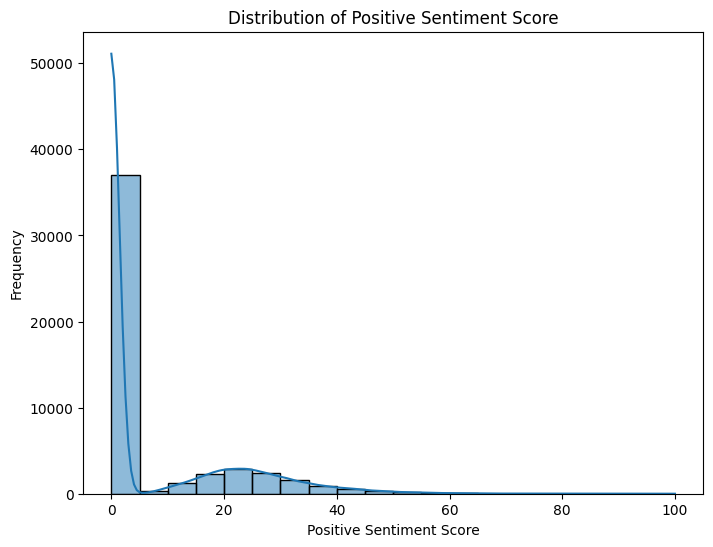

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for 'Positive' sentiment score
plt.figure(figsize=(8, 6))
sns.histplot(df1['Positive'], bins=20, kde=True)
plt.title('Distribution of Positive Sentiment Score')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Frequency')
plt.show()

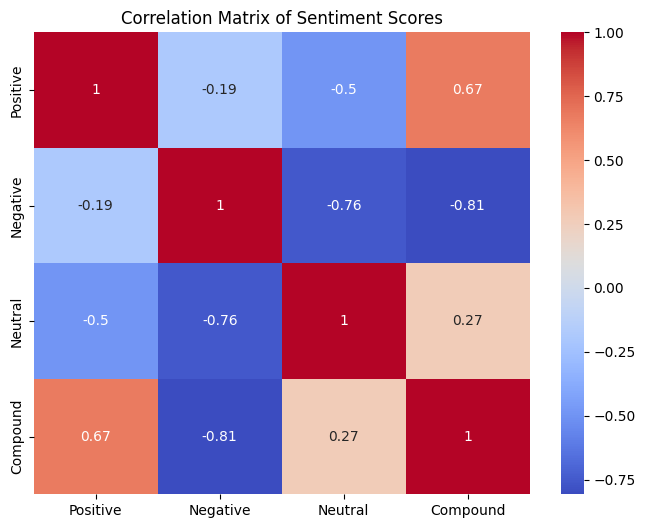

In [73]:
# Example for exploring correlation between sentiment scores
plt.figure(figsize=(8, 6))
sns.heatmap(df1[['Positive', 'Negative', 'Neutral', 'Compound']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sentiment Scores')
plt.show()

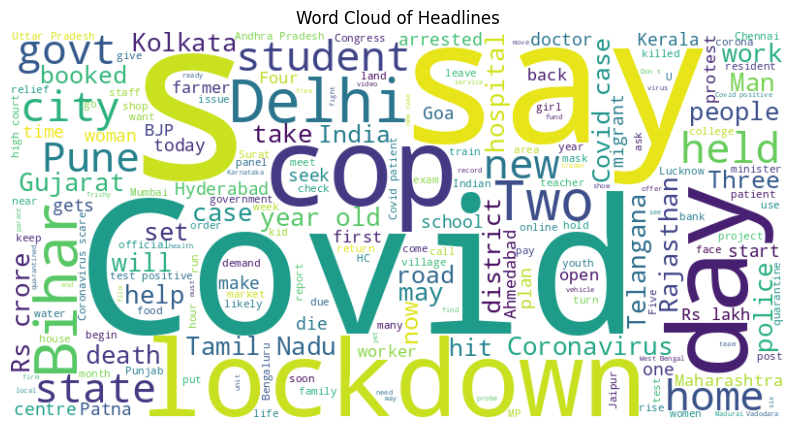

In [75]:
from wordcloud import WordCloud

# Example for creating a word cloud of headlines
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['Headline']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()